In [126]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import warnings

warnings.filterwarnings('ignore')

filepath = 'booksummaries/booksummaries.txt'

novel = 0
fantasy = 0
fiction = 0
children = 0
mystery = 0

In [127]:

df = pd.read_csv(filepath,delimiter='\t')
df.columns = ['WikipediaID', 'Freebase ID', 'Book title', 'Book author', 'Publication date', 'Genres', 'Plot summary']

# duplicate = df[df.duplicated()]
# display(duplicate.shape[0])

df.drop(['WikipediaID', 'Freebase ID', 'Book author', 'Publication date'], axis = 1, inplace = True)
# display(df)       

In [128]:

df = df[df['Genres'].notna()]
df['Book title'] = df['Book title'].astype(str)
df['Genres'] = df['Genres'].astype(str)
df['Plot summary'] = df['Plot summary'].astype(str)

df = df[~df['Genres'].str.contains('iction') | ~df['Genres'].str.contains('ovel')]
df = df[~df['Genres'].str.contains('iction') | ~df['Genres'].str.contains('antasy')]
df = df[~df['Genres'].str.contains('orror') | ~df['Genres'].str.contains('hildren')]

df.loc[df['Genres'].str.contains('hildren', na = False), 'Genres'] = 'Children'
df.loc[df['Genres'].str.contains('iction', na = False), 'Genres'] = 'Fiction'
df.loc[df['Genres'].str.contains('ovel', na = False), 'Genres'] = 'Novel'
df.loc[df['Genres'].str.contains('antasy', na = False), 'Genres'] = 'Fantasy'
df.loc[df['Genres'].str.contains('ystery', na = False), 'Genres'] = 'Mystery'
df.loc[df['Genres'].str.contains('orror', na = False), 'Genres'] = 'Horror'
df.loc[df['Genres'].str.contains('iography', na = False), 'Genres'] = 'Biography'

df = df[~df['Genres'].str.contains('{')]

df.reset_index(drop=True,inplace = True)


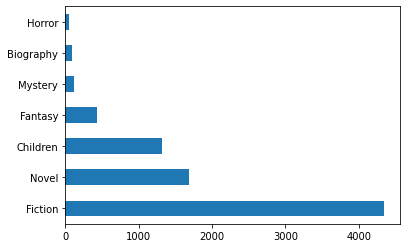

Fiction      4342
Novel        1690
Children     1325
Fantasy       441
Mystery       128
Biography      91
Horror         54
Name: Genres, dtype: int64


,Book title,Genres,Plot summary
0,All Quiet on the Western Front,Novel,"The book tells the story of Paul Bäumer, a Ge..."
1,Blade Runner 3: Replicant Night,Fiction,"Living on Mars, Deckard is acting as a consul..."
2,Blade Runner 2: The Edge of Human,Fiction,Beginning several months after the events in ...
3,Children of Dune,Children,Nine years after Emperor Paul Muad'dib walked...
4,"Candide, ou l'Optimisme",Novel,"Candide contains thirty episodic chapters, wh..."
...,...,...,...
8066,Gates of Paradise,Fiction,"A novel about Annie Stonewall, the daughter o..."
8067,The Third Lynx,Fiction,The story starts with former government agent...
8068,Remote Control,Fiction,The series follows the character of Nick Ston...
8069,Transfer of Power,Fiction,The reader first meets Rapp while he is doing...


In [129]:
values = df['Genres'].value_counts()

values.plot(kind='barh')
plt.show()
print(values)

display(df)

In [130]:
vec = CountVectorizer(stop_words='english').fit(df['Plot summary'])
bag_of_words = vec.transform(df['Plot summary'])

sum_words = bag_of_words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

display(words_freq)

[('time', 5664),
 ('new', 5080),
 ('life', 4762),
 ('father', 4500),
 ('book', 4115),
 ('man', 4090),
 ('story', 3912),
 ('family', 3882),
 ('novel', 3737),
 ('old', 3564),
 ('mother', 3508),
 ('later', 3436),
 ('home', 3403),
 ('world', 3398),
 ('finds', 3382),
 ('years', 3256),
 ('house', 3238),
 ('tells', 3202),
 ('death', 3112),
 ('people', 3016),
 ('day', 2898),
 ('takes', 2875),
 ('way', 2832),
 ('young', 2821),
 ('help', 2809),
 ('war', 2779),
 ('begins', 2629),
 ('love', 2521),
 ('away', 2376),
 ('school', 2338),
 ('named', 2337),
 ('goes', 2331),
 ('soon', 2324),
 ('eventually', 2307),
 ('friend', 2306),
 ('does', 2269),
 ('wife', 2253),
 ('city', 2226),
 ('like', 2192),
 ('end', 2185),
 ('make', 2177),
 ('son', 2159),
 ('woman', 2155),
 ('killed', 2135),
 ('night', 2110),
 ('mr', 2110),
 ('year', 2097),
 ('return', 2093),
 ('ship', 2089),
 ('just', 2081),
 ('children', 2057),
 ('having', 2048),
 ('called', 1980),
 ('earth', 1956),
 ('work', 1939),
 ('place', 1929),
 ('left', 

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(bag_of_words, df['Genres'], test_size=0.1)
text_classifier = MultinomialNB()
text_classifier.fit(X_train, Y_train)

print(text_classifier.score(X_test, Y_test))

0.7153465346534653
